In [ ]:
'''You are a data analyst for a retail chain that operates across
multiple cities. The management team wants to understand the
average daily spending of customers to optimize inventory,
staffing, and marketing strategies. However, collecting data
from all customers is expensive and time-consuming. Instead,
they want you to apply the Central Limit Theorem (CLT) to
estimate population averages reliably using smaller samples.
The company has shared a dataset of 5,000 customer
purchase amounts (in ₹) collected over the last month. Your
task is to analyze this dataset, perform repeated sampling, and
demonstrate how sample means approximate the population mean'''

In [1]:
'''1. Data Preparation & Loading
• Create a Python list/array of 5,000 purchase values
(you may simulate values between ₹50 and ₹5,000 with
some variability).
• Convert the list into a Pandas DataFrame for structured analysis'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Simulate customer purchase data
np.random.seed(42)

# Generate skewed spending data (log-normal for realism: many small spends, few high spends)
purchase_values = np.random.lognormal(mean=7.5, sigma=0.5, size=5000)

# Scale and clip between ₹50 and ₹5000
purchase_values = np.clip(purchase_values, 50, 5000)

# Convert to DataFrame
df = pd.DataFrame(purchase_values, columns=["Purchase"])
print(df.head())

      Purchase
0  2317.761380
1  1687.271236
2  2499.495696
3  3871.955394
4  1608.284421


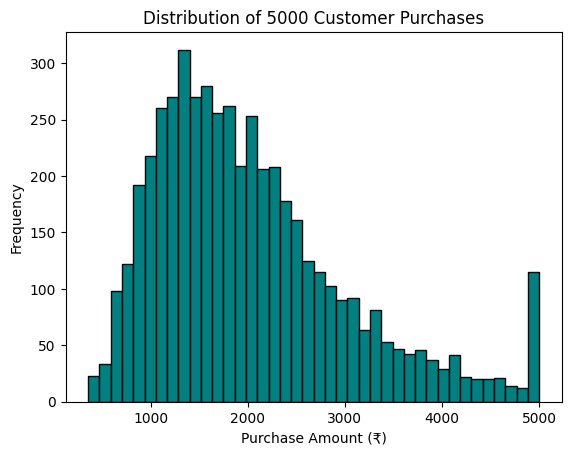

In [2]:
'''2. Data Exploration & Visualization
• Plot a histogram of the original purchase data to observe spending distribution.
• Draw random samples of different sizes (e.g., 30,
100, 300) and repeat the sampling process at least 1,000 times.
• Plot histograms of the sample means for each sample
size to visualize how they form a normal distribution'''

# Histogram of original purchase values
plt.hist(df["Purchase"], bins=40, color='teal', edgecolor='black')
plt.title("Distribution of 5000 Customer Purchases")
plt.xlabel("Purchase Amount (₹)")
plt.ylabel("Frequency")
plt.show()

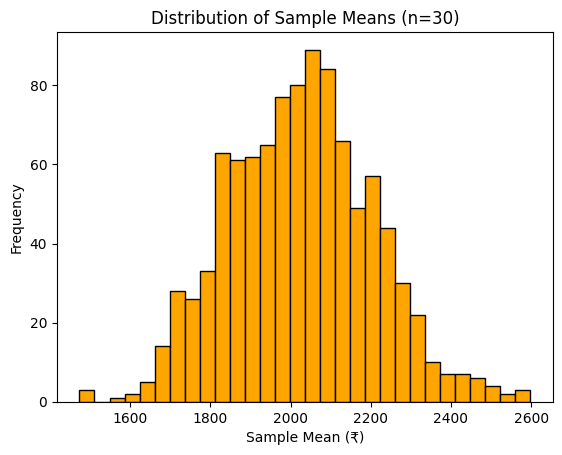

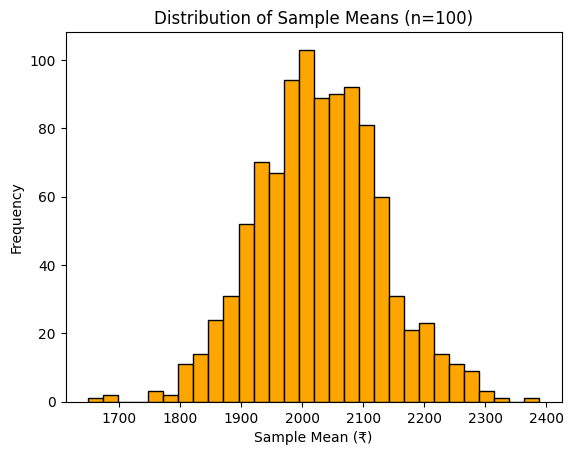

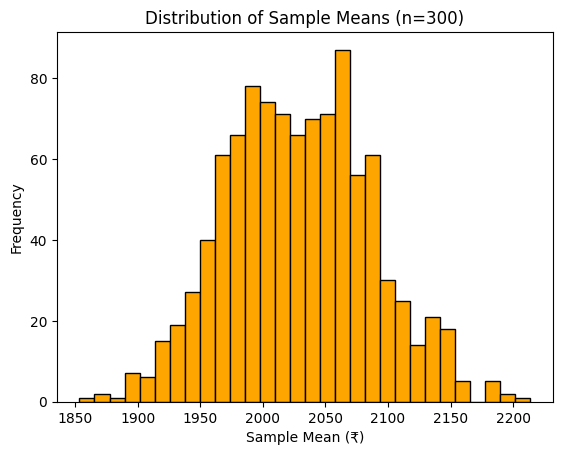

In [3]:
def sample_means(sample_size, n_iterations=1000):
    means = []
    for _ in range(n_iterations):
        sample = df["Purchase"].sample(sample_size, replace=True)
        means.append(sample.mean())
    return means

# Example sample sizes
sample_sizes = [30, 100, 300]
for size in sample_sizes:
    means = sample_means(size)
    plt.hist(means, bins=30, color='orange', edgecolor='black')
    plt.title(f"Distribution of Sample Means (n={size})")
    plt.xlabel("Sample Mean (₹)")
    plt.ylabel("Frequency")
    plt.show()

In [4]:
''' 3. Statistical Insight
• Compute and display the mean, median, variance,
and standard deviation of the purchase dataset.
• Compare the spread of sample means for different sample sizes.
• Explain how larger sample sizes reduce variability and
increase accuracy of estimating the true mean'''

# Original dataset stats
orig_mean = df["Purchase"].mean()
orig_median = df["Purchase"].median()
orig_var = df["Purchase"].var()
orig_std = df["Purchase"].std()

print("Original Purchase Data Statistics:")
print(f"Mean: {orig_mean:.2f} | Median: {orig_median:.2f} | Variance: {orig_var:.2f} | Std Dev: {orig_std:.2f}")

# Compare sample means distribution
for size in sample_sizes:
    means = sample_means(size)
    print(f"\nSample Size: {size}")
    print(f"Mean of Sample Means: {np.mean(means):.2f}")
    print(f"Std Dev of Sample Means: {np.std(means):.2f}")

Original Purchase Data Statistics:
Mean: 2029.05 | Median: 1820.26 | Variance: 989944.63 | Std Dev: 994.96

Sample Size: 30
Mean of Sample Means: 2035.70
Std Dev of Sample Means: 177.88

Sample Size: 100
Mean of Sample Means: 2030.12
Std Dev of Sample Means: 99.24

Sample Size: 300
Mean of Sample Means: 2028.86
Std Dev of Sample Means: 58.09


Enter a sample size (e.g., 50, 150, 500): 1000


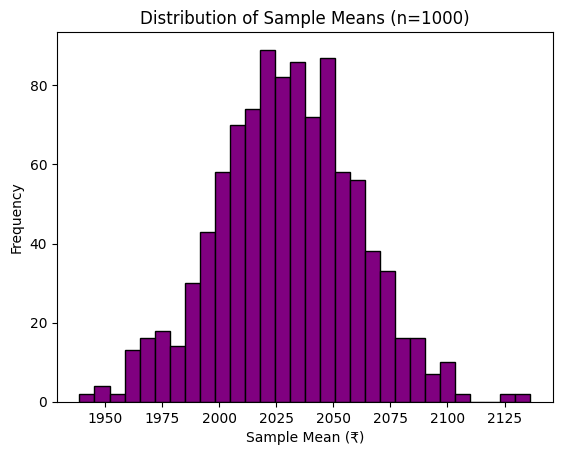

In [5]:
''' 4. Adaptation
• Allow the user to input their own sample size dynamically.
• Show how the shape of the distribution of sample means changes as sample size increases.'''

# User-defined sample size
sample_size = int(input("Enter a sample size (e.g., 50, 150, 500): "))
means = sample_means(sample_size)

plt.hist(means, bins=30, color='purple', edgecolor='black')
plt.title(f"Distribution of Sample Means (n={sample_size})")
plt.xlabel("Sample Mean (₹)")
plt.ylabel("Frequency")
plt.show()